In [1]:
# Import pandas library
import pandas as pd
import numpy as np

# Read Dataset
filename = 'newsCorpora_with_header.csv'
df = pd.read_csv(filename, encoding="utf8", sep='\t', quotechar=" ", engine='python', usecols=["TITLE", "CATEGORY"])

In [2]:
print(df)

                                                    TITLE CATEGORY
0       Fed official says weak data caused by weather,...        b
1       Fed's Charles Plosser sees high bar for change...        b
2       US open: Stocks fall after Fed official hints ...        b
3       Fed risks falling 'behind the curve', Charles ...        b
4       Fed's Plosser: Nasty Weather Has Curbed Job Gr...        b
...                                                   ...      ...
422932  Surgeons to remove 4-year-old's rib to rebuild...        m
422933  Boy to have surgery on esophagus after battery...        m
422934  Child who swallowed battery to have reconstruc...        m
422935  Phoenix boy undergoes surgery to repair throat...        m
422936  Phoenix boy undergoes surgery to repair throat...        m

[422937 rows x 2 columns]


In [3]:
import texthero as hero
from texthero import preprocessing

custom_pipeline = [
    preprocessing.lowercase,
    preprocessing.remove_digits,
    preprocessing.remove_punctuation,
    preprocessing.remove_diacritics,
    preprocessing.remove_stopwords,
    preprocessing.remove_whitespace,
    preprocessing.remove_html_tags,
    preprocessing.remove_urls,
]

df['TITLE'] = hero.clean(df['TITLE'], pipeline=custom_pipeline)

In [4]:
print(df)

                                                    TITLE CATEGORY
0       fed official says weak data caused weather slo...        b
1       fed charles plosser sees high bar change pace ...        b
2       us open stocks fall fed official hints acceler...        b
3       fed risks falling behind curve charles plosser...        b
4             fed plosser nasty weather curbed job growth        b
...                                                   ...      ...
422932  surgeons remove year old rib rebuild damaged t...        m
422933    boy surgery esophagus battery burns hole throat        m
422934  child swallowed battery reconstructive surgery...        m
422935  phoenix boy undergoes surgery repair throat da...        m
422936  phoenix boy undergoes surgery repair throat da...        m

[422937 rows x 2 columns]


In [5]:
df['tfidf'] = (
    hero.tfidf(df['TITLE'], max_features=100)
)

In [6]:
print(df)

                                                    TITLE CATEGORY  \
0       fed official says weak data caused weather slo...        b   
1       fed charles plosser sees high bar change pace ...        b   
2       us open stocks fall fed official hints acceler...        b   
3       fed risks falling behind curve charles plosser...        b   
4             fed plosser nasty weather curbed job growth        b   
...                                                   ...      ...   
422932  surgeons remove year old rib rebuild damaged t...        m   
422933    boy surgery esophagus battery burns hole throat        m   
422934  child swallowed battery reconstructive surgery...        m   
422935  phoenix boy undergoes surgery repair throat da...        m   
422936  phoenix boy undergoes surgery repair throat da...        m   

                                                    tfidf  
0       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

In [7]:
X = df['tfidf'].to_list()

In [8]:
type(X)

list

In [9]:
df['CATEGORY'].head(5)

0    b
1    b
2    b
3    b
4    b
Name: CATEGORY, dtype: object

In [10]:
category_ids = {}
current_id = 0
y = []

# Generate label to number
for label in df['CATEGORY']:
    if not label in category_ids:
        category_ids[label] = current_id
        current_id +=1
    id_ = category_ids[label]
    y.append(id_)

category_ids

{'b': 0, 't': 1, 'e': 2, 'm': 3}

In [11]:
type(y)

list

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [14]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [15]:
dtc.score(X_test,y_test)

0.6209982503428382

In [16]:
predict = dtc.predict(X_test,check_input=True)

data = {
    'y_actual': y_test,
    'y_predicted':predict
}
df_confusion_matrix = pd.DataFrame(data)
confusion_matrix = pd.crosstab(df_confusion_matrix['y_actual'], df_confusion_matrix['y_predicted'], rownames=['Actual'], colnames=['Predicted'])

# Decision Tree Result of Confusion Matrix
print('True Positive (TP): ',confusion_matrix[1][1])
print('False Negative (FN): ',confusion_matrix[1][0])
print('False Positive (FP): ',confusion_matrix[0][1])
print('True Negative (TN): ',confusion_matrix[0][0])

True Positive (TP):  11204
False Negative (FN):  1496
False Positive (FP):  2353
True Negative (TN):  10410


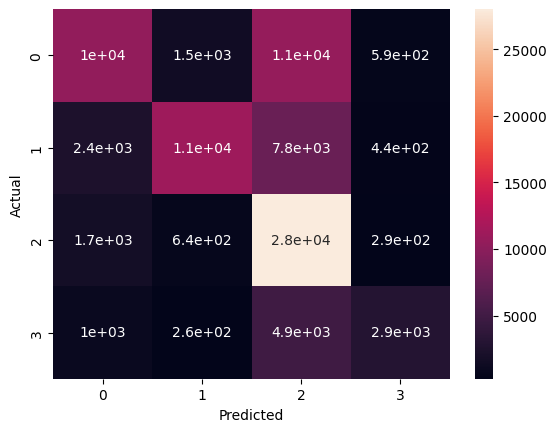

In [17]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [18]:
# Decision Tree Accuracy, Precision, Recall and F1 Score
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
Accuracy = accuracy_score(y_test,dtc.predict(X_test,check_input=True))
Precision = precision_score(df_confusion_matrix['y_actual'], df_confusion_matrix['y_predicted'],average='macro')
Recall = recall_score(df_confusion_matrix['y_actual'], df_confusion_matrix['y_predicted'],average="macro")
F1_score = f1_score(df_confusion_matrix['y_actual'], df_confusion_matrix['y_predicted'],average='macro')

print ("The Accuracy of the model is: ",Accuracy)
print ("The Precision Score of the model is: ",Precision)
print ("The Recall Score of the model is: ",Recall)
print ("The F1 Score of the model is: ",F1_score)

The Accuracy of the model is:  0.6209982503428382
The Precision Score of the model is:  0.6827033471695552
The Recall Score of the model is:  0.5501326679174376
The F1 Score of the model is:  0.5739037797723952


In [19]:
from sklearn.naive_bayes import MultinomialNB
nav = MultinomialNB()
nav.fit(X_train,y_train)

MultinomialNB()

In [20]:
nav.score(X_test,y_test)

0.6082068378493404

In [21]:
nav_predict = nav.predict(X_test)

nav_data = {
    'y_actual': y_test,
    'y_predicted':nav_predict
}
df_nav_confusion_matrix = pd.DataFrame(nav_data)
nav_confusion_matrix = pd.crosstab(df_nav_confusion_matrix['y_actual'], df_nav_confusion_matrix['y_predicted'], rownames=['Actual'], colnames=['Predicted'])

# Nav Bayes Result of Confusion Matrix
print('True Positive (TP): ',nav_confusion_matrix[1][1])
print('False Negative (FN): ',nav_confusion_matrix[1][0])
print('False Positive (FP): ',nav_confusion_matrix[0][1])
print('True Negative (TN): ',nav_confusion_matrix[0][0])

True Positive (TP):  10127
False Negative (FN):  1136
False Positive (FP):  2874
True Negative (TN):  10270


In [22]:
Accuracy = accuracy_score(df_nav_confusion_matrix['y_actual'], df_nav_confusion_matrix['y_predicted'])
Precision = precision_score(df_nav_confusion_matrix['y_actual'], df_nav_confusion_matrix['y_predicted'],average='macro')
Recall = recall_score(df_nav_confusion_matrix['y_actual'], df_nav_confusion_matrix['y_predicted'],average="macro")
F1_score = f1_score(df_nav_confusion_matrix['y_actual'], df_nav_confusion_matrix['y_predicted'],average='macro')

# Nav Bayes Accuracy , Precision, Recall and F1 Score
print ("The Accuracy of the model is: ",Accuracy)
print ("The Precision Score of the model is: ",Precision)
print ("The Recall Score of the model is: ",Recall)
print ("The F1 Score of the model is: ",F1_score)

The Accuracy of the model is:  0.6082068378493404
The Precision Score of the model is:  0.6813339476646205
The Recall Score of the model is:  0.5330092168529559
The F1 Score of the model is:  0.5558399565804789


In [23]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=300)

In [24]:
ann.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=300)

In [25]:
ann.score(X_test,y_test)

0.6163167352343122

In [26]:
ann_predict = ann.predict(X_test)

ann_data = {
    'y_actual': y_test,
    'y_predicted':ann_predict
}
df_ann_confusion_matrix = pd.DataFrame(ann_data)
ann_confusion_matrix = pd.crosstab(df_ann_confusion_matrix['y_actual'], df_ann_confusion_matrix['y_predicted'], rownames=['Actual'], colnames=['Predicted'])

# ANN Result of Confusion Matrix
print('True Positive (TP): ',ann_confusion_matrix[1][1])
print('False Negative (FN): ',ann_confusion_matrix[1][0])
print('False Positive (FP): ',ann_confusion_matrix[0][1])
print('True Negative (TN): ',ann_confusion_matrix[0][0])

True Positive (TP):  10740
False Negative (FN):  1321
False Positive (FP):  2666
True Negative (TN):  10514


In [27]:
Accuracy = accuracy_score(df_ann_confusion_matrix['y_actual'], df_ann_confusion_matrix['y_predicted'])
Precision = precision_score(df_ann_confusion_matrix['y_actual'], df_ann_confusion_matrix['y_predicted'],average='macro')
Recall = recall_score(df_ann_confusion_matrix['y_actual'], df_ann_confusion_matrix['y_predicted'],average="macro")
F1_score = f1_score(df_ann_confusion_matrix['y_actual'], df_ann_confusion_matrix['y_predicted'],average='macro')

# ANN Accuracy, Precision, Recall and F1 Score
print ("The Accuracy of the model is: ",Accuracy)
print ("The Precision Score of the model is: ",Precision)
print ("The Recall Score of the model is: ",Recall)
print ("The F1 Score of the model is: ",F1_score)

The Accuracy of the model is:  0.6163167352343122
The Precision Score of the model is:  0.6814296349146927
The Recall Score of the model is:  0.5438155095771033
The F1 Score of the model is:  0.5673867927615918
